Creating Grovers algortim advanced for n bits

In [56]:
import numpy as np

from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2,Session

In [57]:
def oracle_n(n,state,name="Uf"):
    #this gate mutlipys phase by -1
    oracle=QuantumCircuit(n,name=name)
    ctrl=list(range(n-1))
    #making phase flip ie CZ gate
    #state=state[::-1][1:]   #reversing and removing last bit
    state=state[1:]
    oracle.h(n-1)
    oracle.mcx(ctrl,n-1,ctrl_state=state)
    oracle.h(n-1)
    display(oracle.draw("mpl"))
    return oracle 

In [58]:
def diffuser_n(n,name="V"):
    diffuser=QuantumCircuit(n,name=name)
    ctrl=list(range(n-1))
    state='0' *(n-1)
    diffuser.h(range(n))
    diffuser.x(n-1)
    diffuser.h(n-1)
    diffuser.mcx(ctrl,n-1,ctrl_state=state)
    diffuser.h(n-1)
    diffuser.x(n-1)
    diffuser.h(range(n))
    display(diffuser.draw("mpl"))
    return diffuser

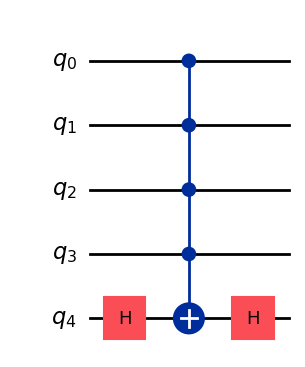

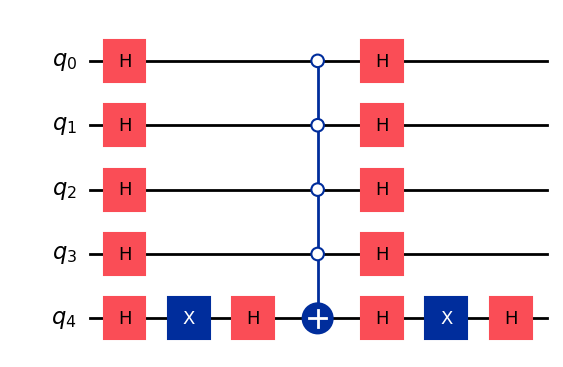

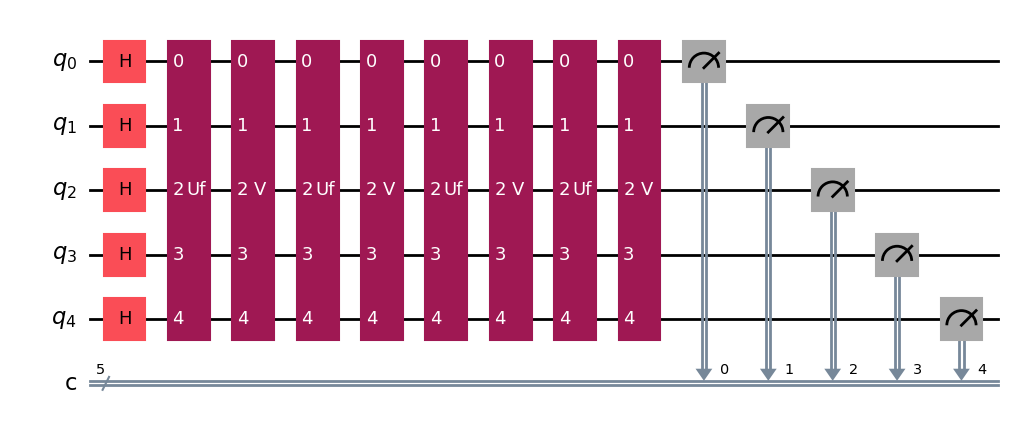

In [59]:
n=int(input("Enter number of bits"))#Number of bits
state=input("Enter state:")
nsol=1 #No of solutions
alpha=np.arcsin(np.sqrt(nsol/2**(n)))
r=round(np.pi/(4*alpha) -0.5)
qc=QuantumCircuit(n,n)
qc.h(range(n))
oracle_gate=oracle_n(n,state)
diffuser_gate=diffuser_n(n)
for i in range(r):
    qc.append(oracle_gate,range(n))
    qc.append(diffuser_gate,range(n))
qc.measure(range(n),range(n))
display(qc.draw("mpl"))

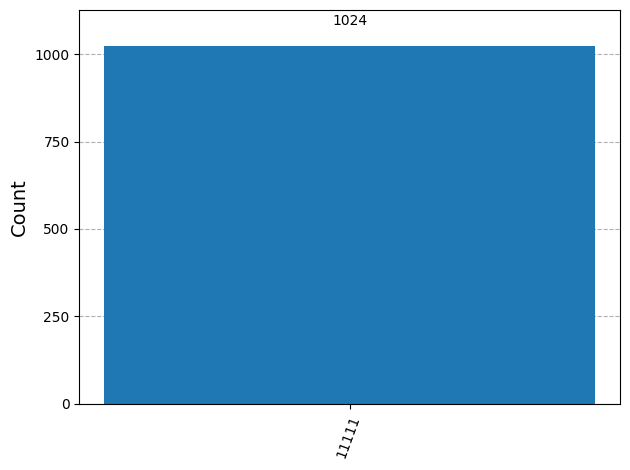

In [60]:
sim=AerSimulator()
compiled=transpile(qc,sim)
result=sim.run(compiled,shots=1024).result()
stats=result.get_counts()
plot_histogram(stats)